<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Chi-squared-tests" data-toc-modified-id="Chi-squared-tests-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chi squared tests</a></span></li><li><span><a href="#T-test" data-toc-modified-id="T-test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>T test</a></span></li><li><span><a href="#annova-test" data-toc-modified-id="annova-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>annova test</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></div>

In [3]:
from sklearn import datasets as ds
import pandas as pd
import seaborn as sns

In [4]:
df = ds.load_iris()

In [5]:
X = pd.DataFrame(df.data)
Y = pd.DataFrame(df.target)

In [6]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


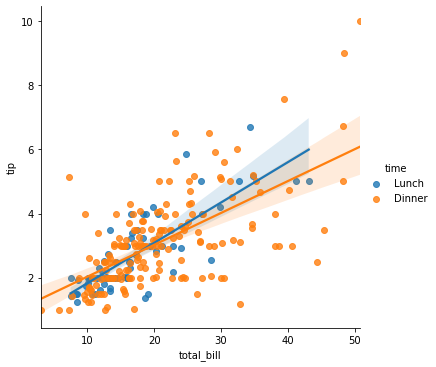

In [7]:
sns.lmplot(x = 'total_bill', y = 'tip' , data = df, hue = 'time')

In [8]:
cor = df.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [9]:
df['tip2'] = df.tip/df.total_bill

<AxesSubplot:>

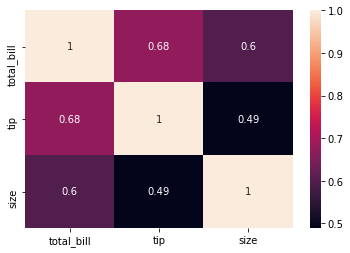

In [10]:
sns.heatmap(cor, annot = True)

In [11]:
y

NameError: name 'y' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y

In [ ]:
X_train, X_valid,  y_train , y_valid = train_test_split(X,y)

In [12]:
y_train

NameError: name 'y_train' is not defined

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


model = LinearRegression()
model.fit(X_train[['total_bill','size']], y_train)


NameError: name 'X_train' is not defined

In [14]:
y_pred = model.predict(X_valid[['total_bill','size']])

NameError: name 'X_valid' is not defined

In [15]:
 mean_absolute_error(y_pred, y_valid)/ y_valid.mean()

NameError: name 'y_pred' is not defined

In [16]:
df

,total_bill,tip,sex,smoker,day,time,size,tip2
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [17]:
y_train.dtype

NameError: name 'y_train' is not defined

In [18]:
X_train.dtypes

NameError: name 'X_train' is not defined

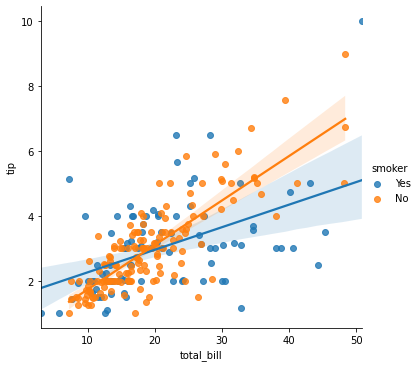

In [19]:
sns.lmplot(x = 'total_bill' , y = 'tip', data = df, hue = 'smoker')

In [20]:
df.groupby(['sex','smoker']).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

## Hypothesis testing

### Chi squared tests

In [26]:
from scipy.stats import chisquare
from scipy import stats

contingency = pd.crosstab(df.smoker, df.sex)
contingency

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [27]:
1 - stats.chi2.cdf(3.84, 1)
0.050043521248705147

0.05004352124870515

In [29]:
from scipy.stats import chi2_contingency

In [28]:
chi2_contingency(tshirts)

NameError: name 'chi2_contingency' is not defined

In [24]:
tshirts = pd.DataFrame([[48,22,33,47],[35,36,42,27]])

### T test

In [25]:
from scipy.stats import ttest_ind

#Statsiticaly significant difference

ttest_ind(df.tip,df.total_bill)

Ttest_indResult(statistic=-29.1067945590078, pvalue=1.4419939457083578e-108)

In [176]:
df2 = df[['tip','total_bill']]

<AxesSubplot:>

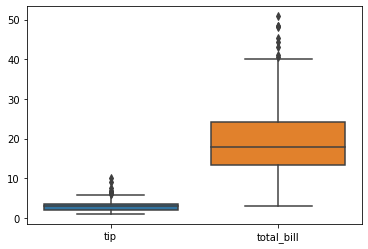

In [181]:
sns.boxplot(data = df2)

### annova test

In [182]:
from scipy.stats import f_oneway

In [183]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


surprisingly showing decent significant difference between the 2 sexes, when plot shows otherwise. Surprising how stats looks at things and how we look at it (not sure if im doing something wrong)

In [189]:
f_oneway(df.total_bill[df.sex == 'Male'],df.total_bill[df.sex == 'Female'] )

F_onewayResult(statistic=5.188345638458361, pvalue=0.023611666846859697)

In [230]:
a = sum((df.total_bill[df.sex == 'Male'] - df.total_bill[df.sex == 'Male'].mean())**2)
b = sum((df.total_bill[df.sex == 'Female'] - df.total_bill[df.sex == 'Female'].mean())**2)
(a+b)/(len(df.total_bill) - 2)


77.27147398832693

In [234]:
from sklearn.metrics import mean_squared_error

df.total_bill.mean(), df.groupby('sex').total_bill.mean()
d =((19.78 - 20)**2) + ((19.78 - 18.056897)**2)

a = sum((df.total_bill[df.sex == 'Male'] - df.total_bill[df.sex == 'Male'].mean())**2)
b = sum((df.total_bill[df.sex == 'Female'] - df.total_bill[df.sex == 'Female'].mean())**2)
c = (a+b)/(len(df.total_bill) - 2)

#F statistic
F = d/c
F

0.03873034017796153

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

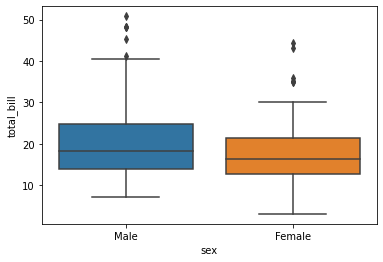

In [192]:
sns.boxplot(y = df.total_bill , x = df.sex)

## Linear Regression

<AxesSubplot:>

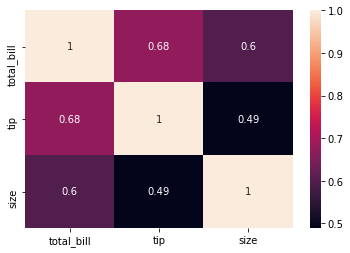

In [244]:
sns.heatmap(df.corr(), annot = True)

In [248]:
from sklearn.linear_model import LinearRegression

In [250]:
model = LinearRegression()

In [278]:
cat_cols = df2.select_dtypes(include = 'category').columns
num_cols = df2.select_dtypes(exclude = 'category').columns
df2_onehot = pd.get_dummies(df2[cat_cols])
df2_onehot
df3 = pd.concat([df2[num_cols], df2_onehot], axis = 1)

y = df3.pop('tip')

In [290]:
model.fit(df3, y)
y_pred = model.predict(df3)

#Gives R squared value
model.score(df3, y)

0.47007812322060794

Gives R squared value

seems like there is no direct function for adjusted R squared

In [289]:
from sklearn.metrics import r2_score

r2_score(y,y_pred)

0.47007812322060794

In [292]:
#model coeffecients
model.coef_

array([ 0.09448701,  0.175992  , -0.01622047,  0.01622047, -0.04320416,
        0.04320416, -0.08495964,  0.07729956, -0.04415882,  0.0518189 ,
        0.0340643 , -0.0340643 ])